In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the Dataset
df = pd.read_csv("malicious_phish.csv")
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [3]:
features = df.columns
print(features)

Index(['url', 'type'], dtype='object')


In [4]:
df.describe()

,url,type
count,302664,302663
unique,297588,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,101,221334


In [5]:
df['type'].value_counts()

,count
type,
benign,221334
defacement,55984
phishing,18122
malware,7223


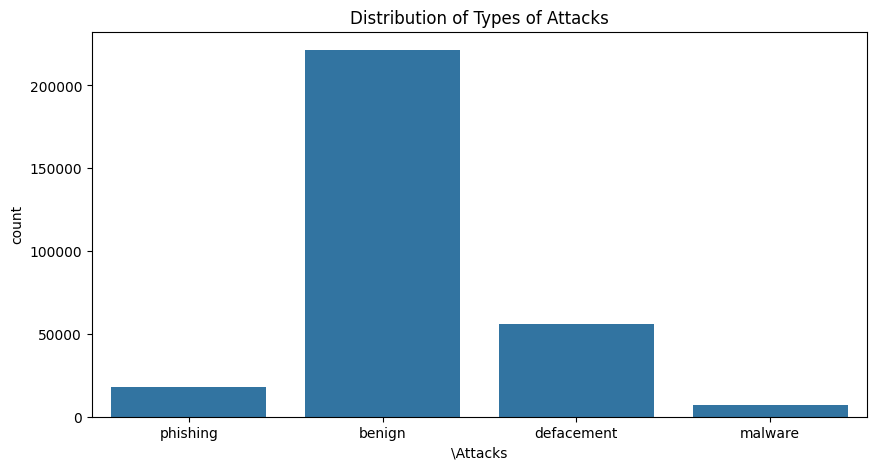

In [7]:
plt.figure(figsize= (10 , 5))
plt.title('Distribution of Types of Attacks')
sns.countplot(x = 'type', data = df)
# ax.bar_label(ax.containers[0])
plt.xlabel('\Attacks')
plt.savefig('./Images/Distribution of Types of Attacks.png', bbox_inches='tight')

### **Word Colud of Different Types of Attacks**

In [8]:
df_phish = df[df['type'] == 'phishing']
df_benign = df[df['type'] == 'benign']
df_deface = df[df['type'] == 'defacement']
df_malware = df[df['type'] == 'malware']

In [9]:
phish_url = " ".join(i for i in df_phish.url)
# print(phish_url[0: 1000])
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color="white",
    colormap="Set2",

).generate(phish_url)

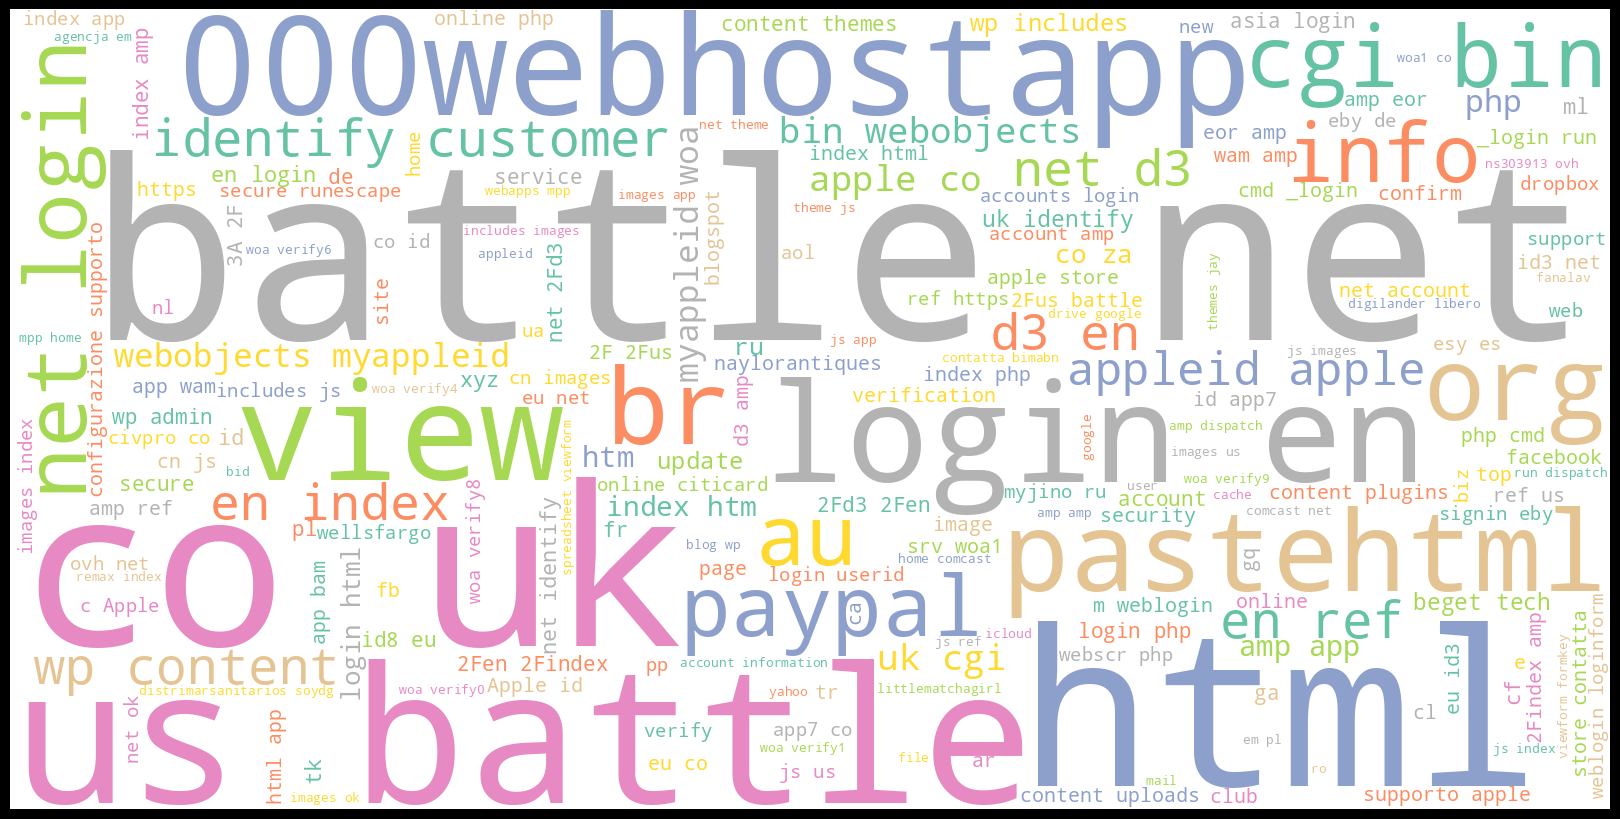

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure( figsize=(16,18),facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig('./Images/phish_wordcloud.png', bbox_inches='tight')

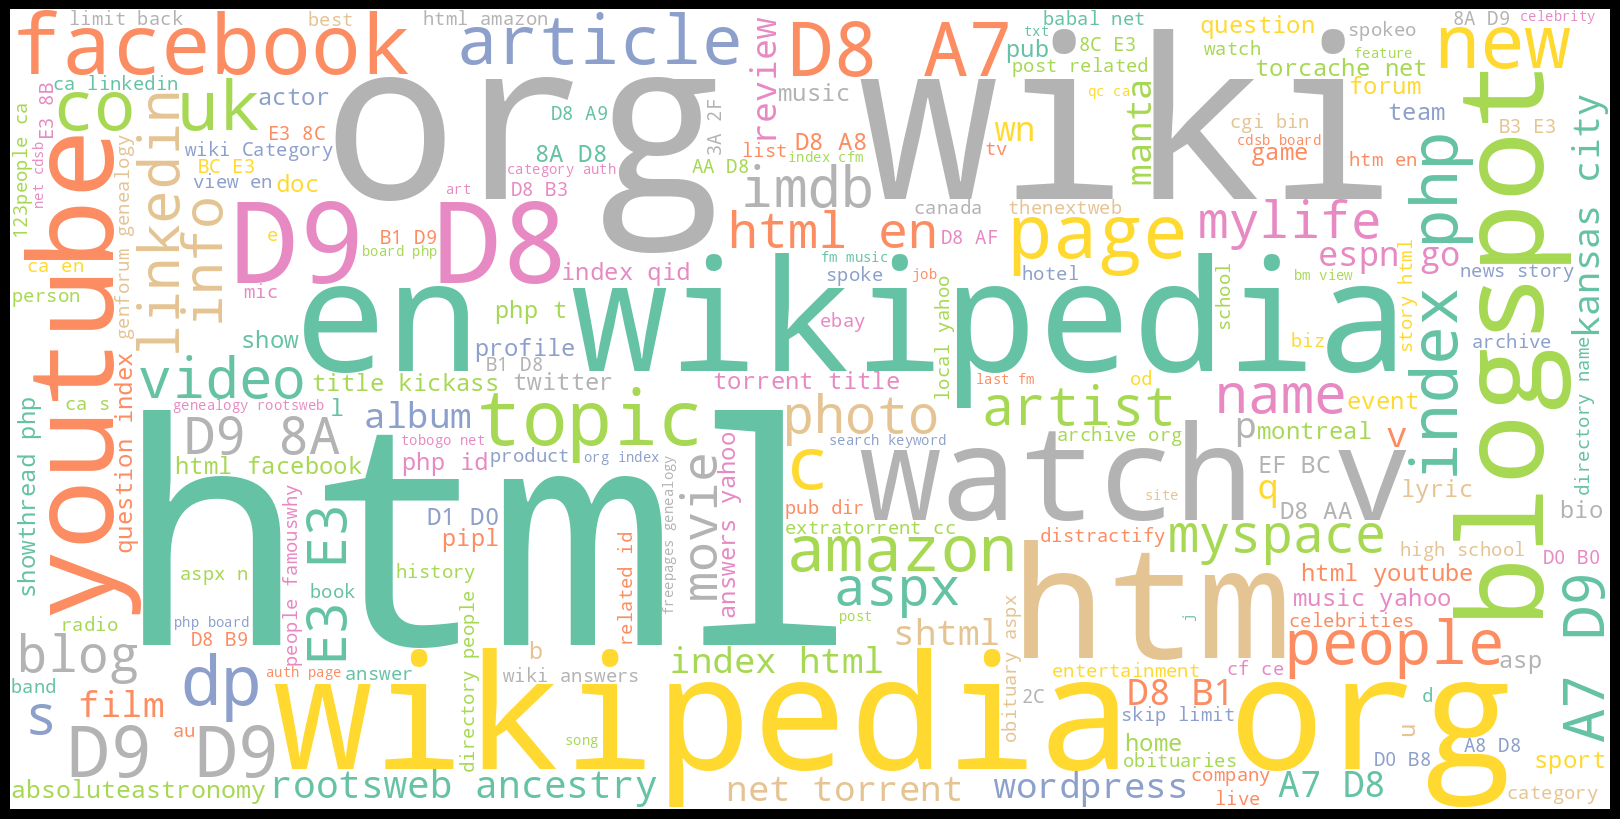

<Figure size 640x480 with 0 Axes>

In [11]:
benign_url = " ".join(i for i in df_benign.url)

wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color="white",
    colormap="Set2",

).generate(benign_url)


plt.figure( figsize=(16,18),facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig('./Images/benign_wordcloud.png')

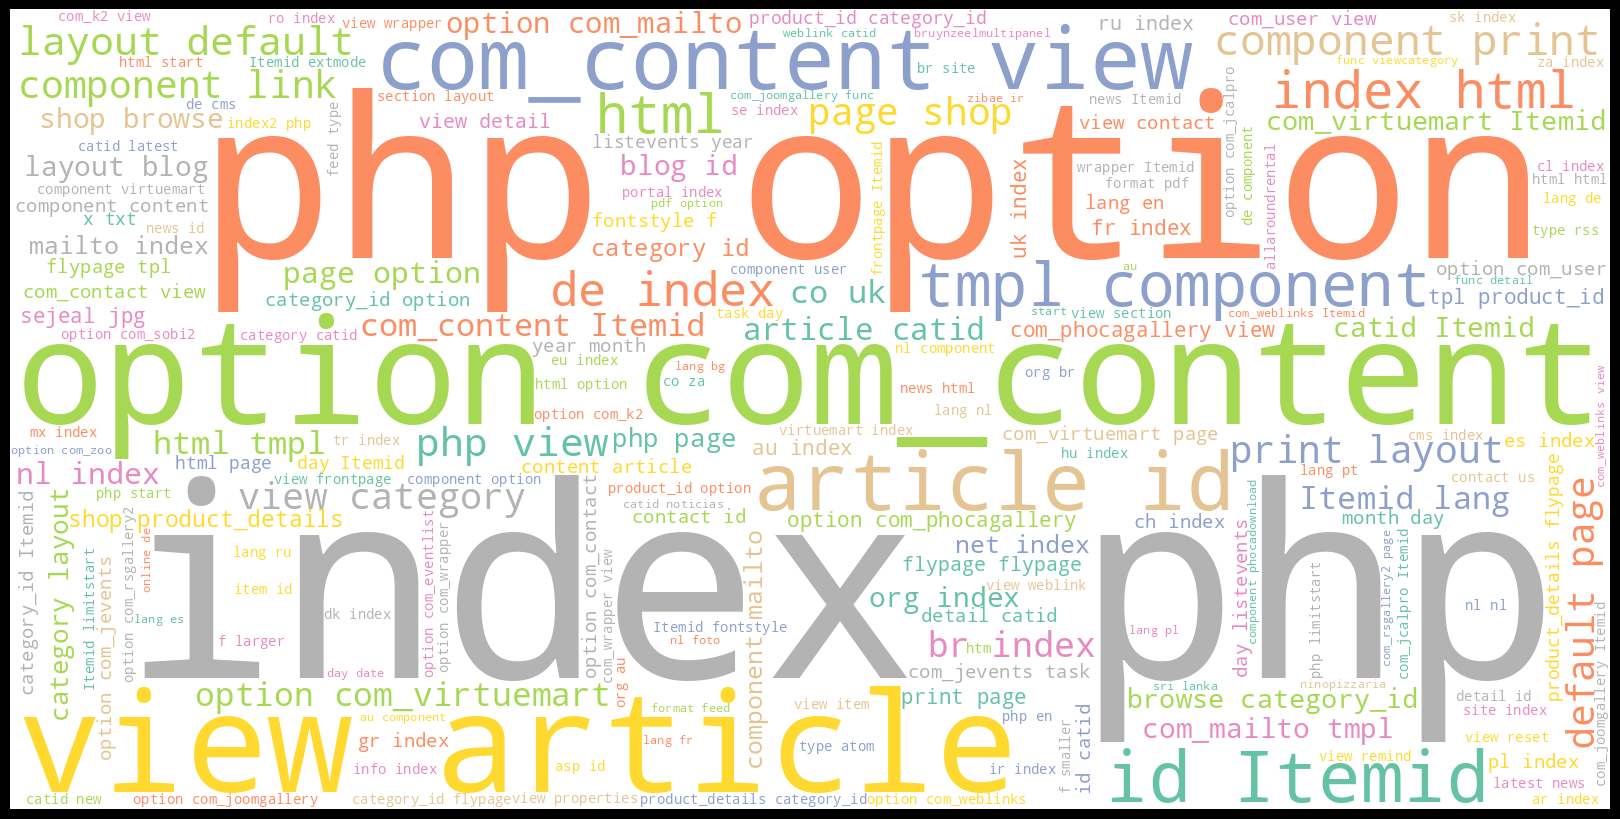

<Figure size 640x480 with 0 Axes>

In [12]:
deface_url = " ".join(i for i in df_deface.url)

wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color="white",
    colormap="Set2",

).generate(deface_url)


plt.figure( figsize=(16,18),facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig('./Images/deface_wordcloud.png')

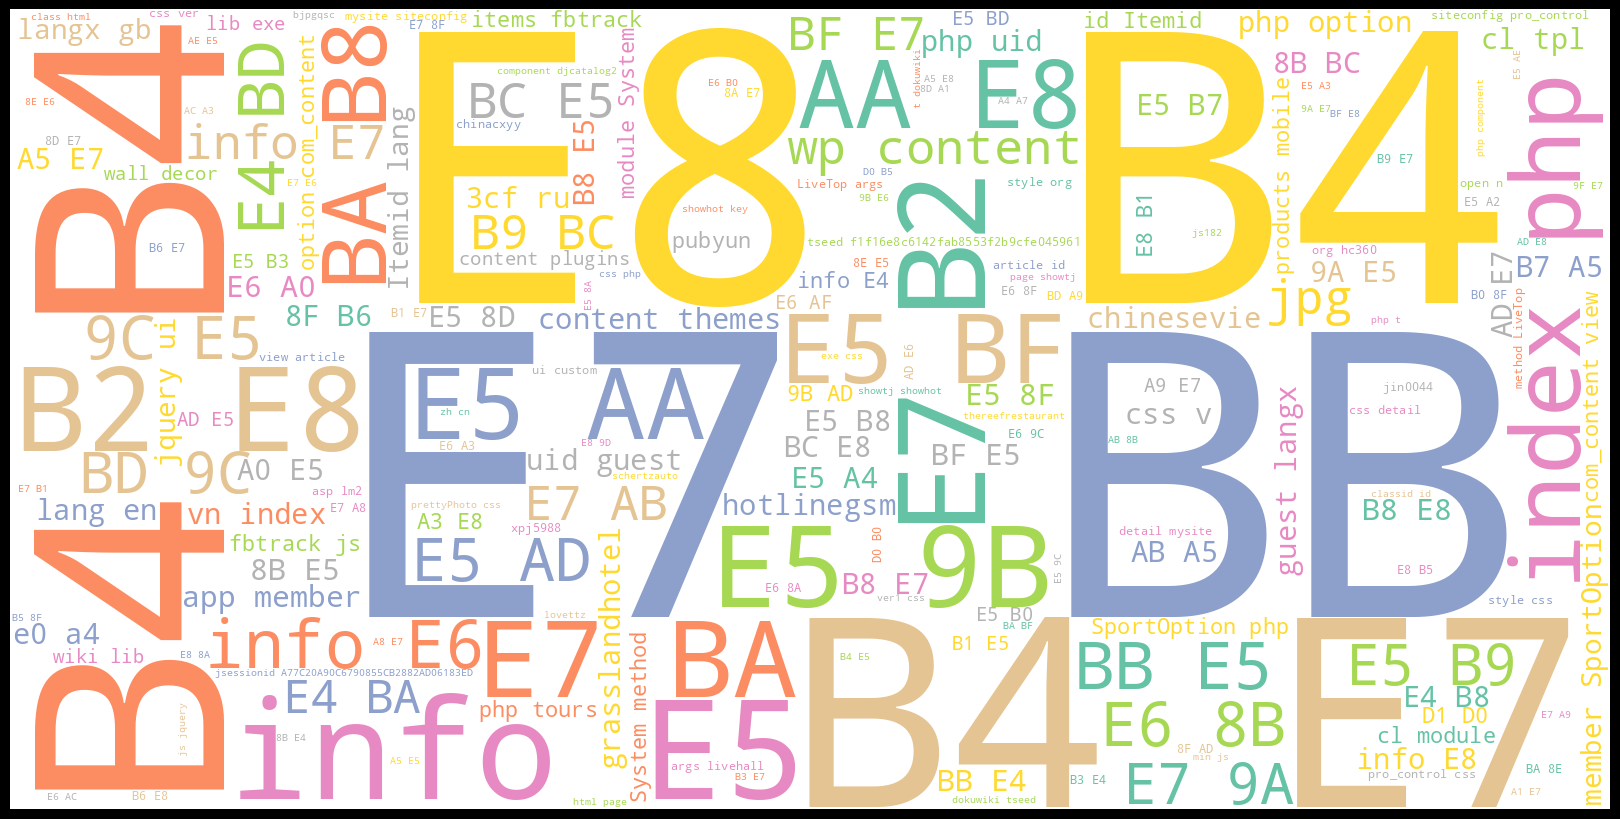

<Figure size 640x480 with 0 Axes>

In [13]:
malware_url = " ".join(i for i in df_malware.url)

wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color="white",
    colormap="Set2",

).generate(malware_url)


plt.figure( figsize=(16,18),facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig('./Images/malware_wordcloud.png')

## **Feature Engineering**
In this step, we will extract the following lexical features from raw URLs, as these features will be used as the input features for training the machine learning model. The following features are created as follows:

### having_ip_address:
Generally cyber attackers use an IP address in place of the domain name to hide the identity of the website. this feature will check whether the URL has IP address or not.

In [14]:
import re

#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6


    if match:

        return 1
    else:

        return 0

df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [15]:
df['use_of_ip'].value_counts()

,count
use_of_ip,
0,302539
1,125


In [16]:
df[df['use_of_ip'] == 1]

,url,type,use_of_ip
10408,http://219.232.244.89/intl/update/error_login.htm,phishing,1
12441,boards.ancestry.com/topics.ethnic.natam.nation...,benign,1
12853,http://www.controlyourbreath.com/new/css_/img/...,phishing,1
13161,http://www.reqntpvw.com/Public/softs/everythin...,malware,1
14915,http://66.208.115.70/images/index.asp,phishing,1
...,...,...,...
285864,http://216.104.44.194/.svn/www/Paypal.com/inde...,phishing,1
286149,http://84.203.152.12/recordings/4/www.paypal.c...,phishing,1
292139,http://210.42.144.243/images/tam1.html,phishing,1
294777,http://66.184.94.210/paypal/payment.php,phishing,1


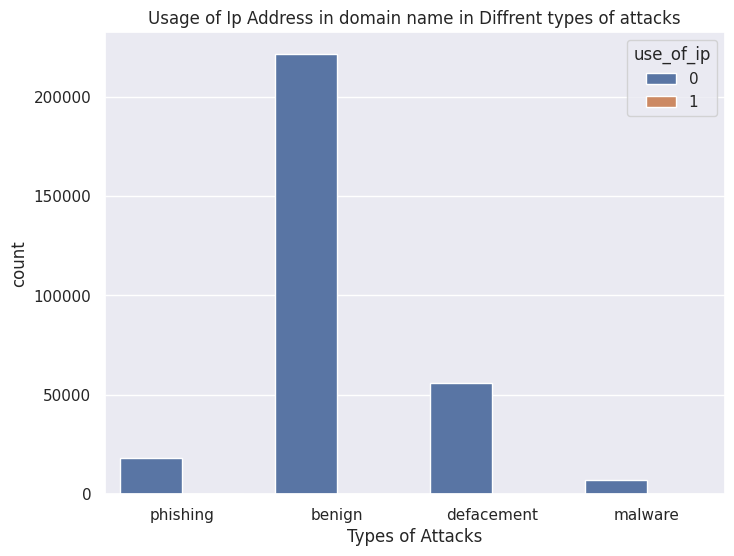

In [17]:
plt.figure(figsize = (8 , 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, hue="use_of_ip")
plt.xlabel('Types of Attacks')
plt.title("Usage of Ip Address in domain name in Diffrent types of attacks")
plt.savefig('./Images/usageOfIP.png')

In [18]:
arr = np.where(df[df['type'] == 'benign']['use_of_ip'] == 1)
arr[0].shape

(27,)

In [19]:
arr = np.where(df[df['type'] == 'malware']['use_of_ip'] == 1)
arr[0].shape

(9,)

In [20]:
arr = np.where(df[df['type'] == 'phishing']['use_of_ip'] == 1)
arr[0].shape

(89,)

In [21]:
arr = np.where(df[df['type'] == 'defacement']['use_of_ip'] == 1)
arr[0].shape

(0,)


## Abnormal URL
This feature can be extracted from the WHOIS database. For a legitimate website, identity is typically part of its URL.

In [22]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:

        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [23]:
df['abnormal_url'].value_counts()

,count
abnormal_url,
0,213875
1,88789


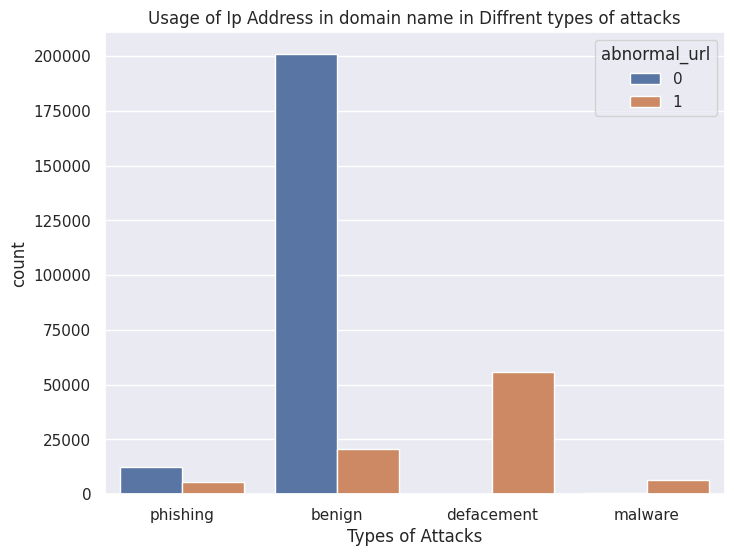

In [24]:
plt.figure(figsize = (8 , 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, hue="abnormal_url")
plt.xlabel('Types of Attacks')
plt.title("Usage of Ip Address in domain name in Diffrent types of attacks")
plt.savefig("./Images/usageOf_IP_address.png")

In [25]:
arr = df[df['type'] == 'benign']['abnormal_url'].value_counts()
# arr[0].shape
arr

,count
abnormal_url,
0,200854
1,20480


In [26]:
arr = df[df['type'] == 'phishing']['abnormal_url'].value_counts()
# arr[0].shape
arr

,count
abnormal_url,
0,12323
1,5799


In [27]:
arr = df[df['type'] == 'defacement']['abnormal_url'].value_counts()
# arr[0].shape
arr

,count
abnormal_url,
1,55984


In [28]:
arr = df[df['type'] == 'malware']['abnormal_url'].value_counts()
# arr[0].shape
arr

,count
abnormal_url,
1,6525
0,698


### google_index
n this feature, we check whether the URL is indexed in google search console or not.

In [29]:
from googlesearch import search

In [30]:
def google_index(url):

    site = search(url, 5)
    return 1 if site else 0

df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [31]:
print(df['url'][0])

br-icloud.com.br


In [32]:
df['google_index'].value_counts()

,count
google_index,
1,302664


## Count dot (.) :
The phishing or malware websites generally use more than two sub-domains in the URL. Each domain is separated by dot (.). If any URL contains more than three dots(.), then it increases the probability of a malicious site.

In [33]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))

In [34]:
df['count.'].value_counts()

,count
count.,
1,120630
2,111888
3,51430
4,12850
5,2657
6,969
7,534
10,389
8,330


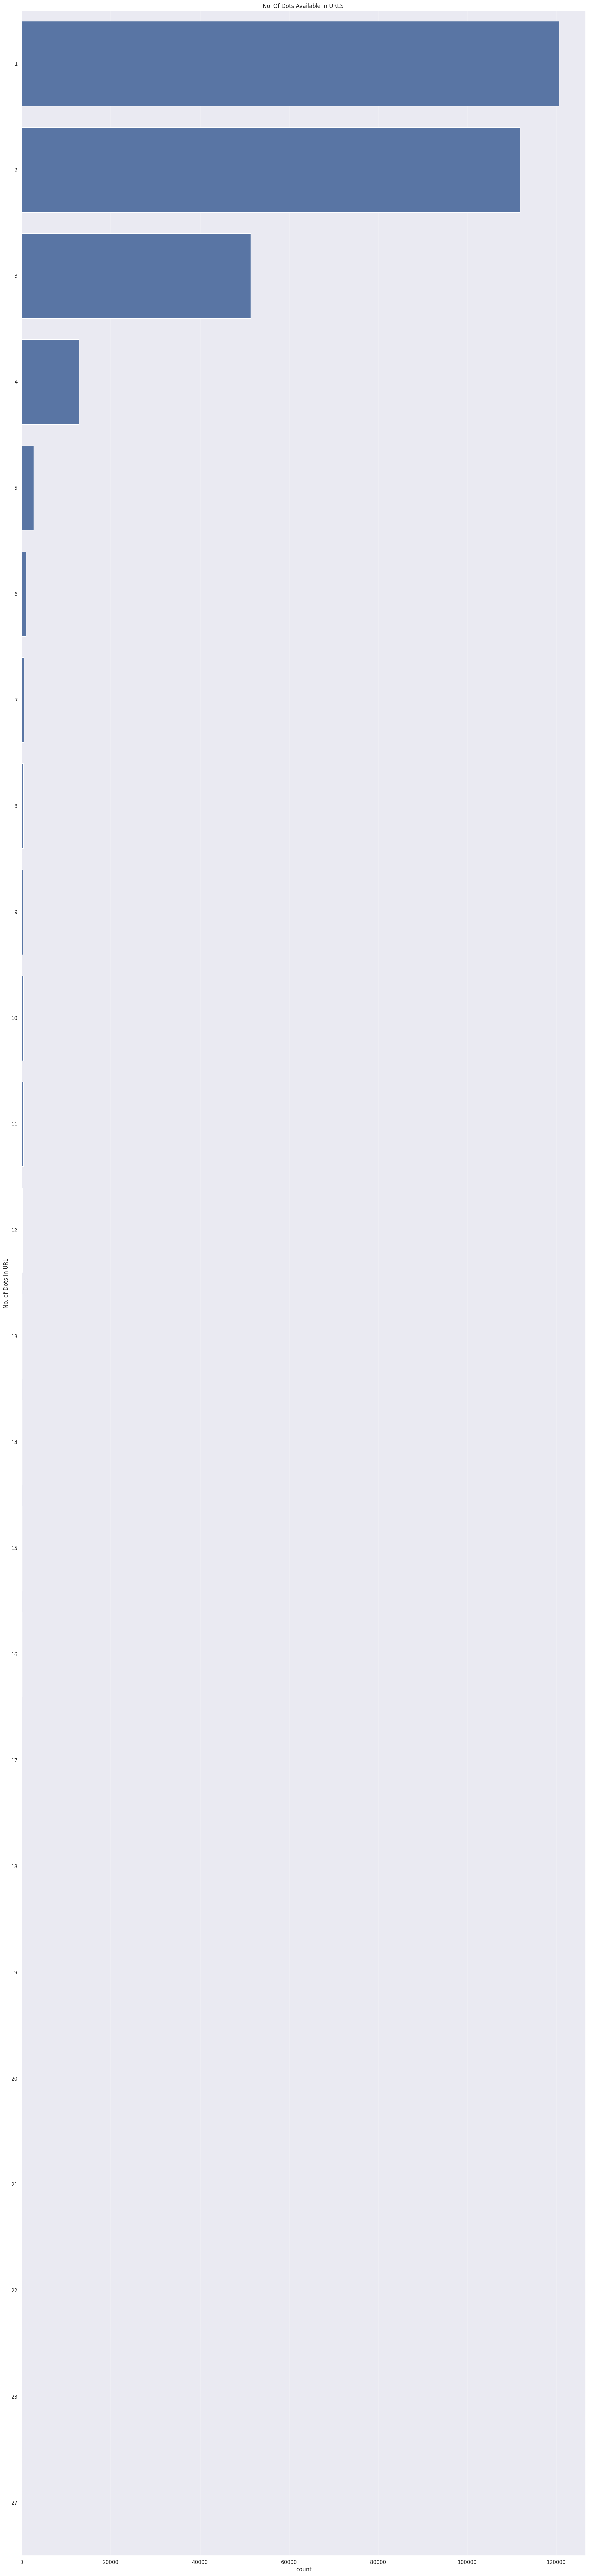

In [35]:
plt.figure(figsize = (22 , 100))
sns.set(style="darkgrid")
ax = sns.countplot(y="count.", data=df)
plt.ylabel('No. of Dots in URL')
plt.title("No. Of Dots Available in URLS ")
plt.savefig("./Images/CountOfDots.png")

## Count-www:
Generally most of the safe websites have one www in its URL. This feature helps in detecting malicious websites if the URL has no or more than one www in its URL.

In [36]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

In [37]:
df['count-www'].value_counts()

,count
count-www,
0,258823
1,43696
2,142
4,1
3,1
5,1


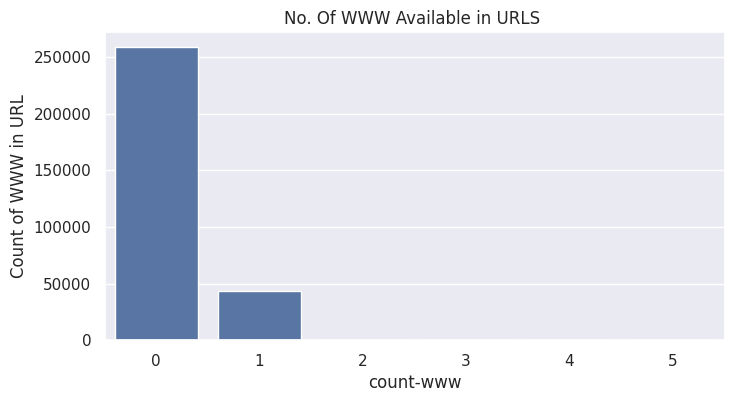

In [38]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count-www", data=df)
plt.ylabel('Count of WWW in URL')
plt.title("No. Of WWW Available in URLS ")
plt.savefig("./Images/CountOfWWW.png")

## count@:
The presence of the “@” symbol in the URL ignores everything previous to it.

In [39]:
def count_atrate(url):

    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))

In [40]:
df['count@'].value_counts()

,count
count@,
0,302422
1,229
2,11
3,2


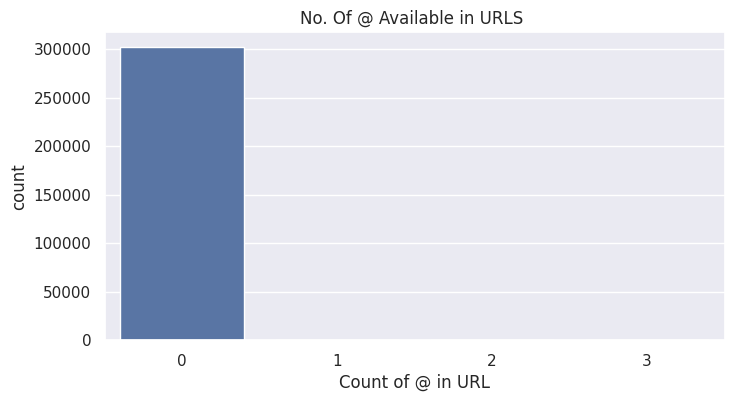

In [41]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count@", data=df)
plt.xlabel('Count of @ in URL')
plt.title("No. Of @ Available in URLS ")
plt.savefig("./Images/countOf@.png")

# Count_dir:
The presence of multiple directories in the URL generally indicates suspicious websites.

In [42]:
def no_of_dir(url):
    urldir = urlparse(url).path
#     print(urldir)
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

In [43]:
print(df['url'][5])
no_of_dir(df['url'][5])

http://buzzfil.net/m/show-art/ils-etaient-loin-de-s-imaginer-que-le-hibou-allait-faire-ceci-quand-ils-filmaient-2.html


3

In [44]:
df['count_dir'].value_counts()

,count
count_dir,
1,104277
2,78162
3,56040
4,25375
5,16076
0,12895
6,5817
7,2209
8,750


## Count_embed_domain:
The number of the embedded domains can be helpful in detecting malicious URLs. It can be done by checking the occurrence of “//” in the URL.

In [45]:
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domain'] = df['url'].apply(lambda i: no_of_embed(i))

In [46]:
def no_of_embed(url):
    urldir = urlparse(url).path

    print(urldir)
    return urldir.count('//')

print(df['url'][7])
no_of_embed(df['url'][7])

yourbittorrent.com/?q=anthony-hamilton-soulife
yourbittorrent.com/


0

In [47]:
df['count_embed_domain'].value_counts()

,count
count_embed_domain,
0,302541
1,123


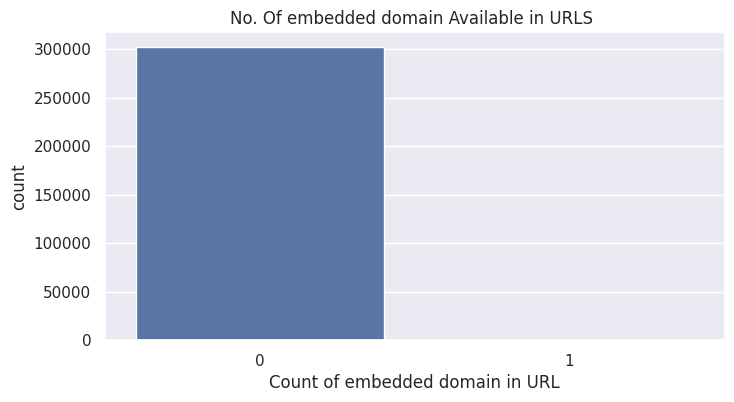

In [48]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count_embed_domain", data=df)
plt.xlabel('Count of embedded domain in URL')
plt.title("No. Of embedded domain Available in URLS ")
plt.savefig("./Images/countOfEmbeddedDomain.png")

## Suspicious words in URL:
Malicious URLs generally contain suspicious words in the URL such as PayPal, login, sign in, bank, account, update, bonus, service, ebayisapi, token, etc. We have found the presence of such frequently occurring suspicious words in the URL as a binary variable i.e., whether such words present in the URL or not.

In [49]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0

df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

In [50]:
df['sus_url'].value_counts()

,count
sus_url,
0,292574
1,10090


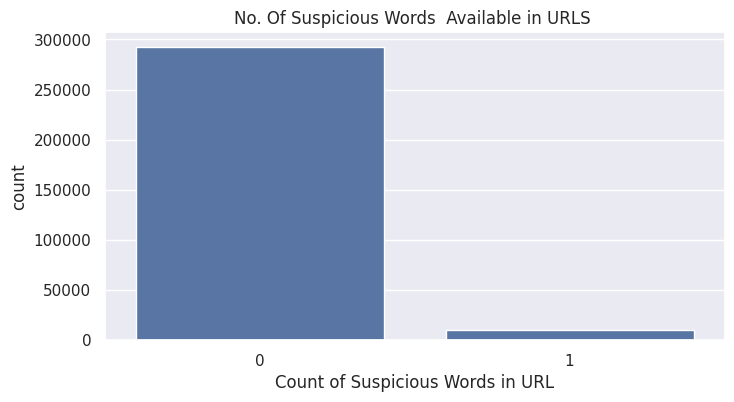

In [51]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="sus_url", data=df)
plt.xlabel('Count of Suspicious Words in URL')
plt.title("No. Of Suspicious Words  Available in URLS ")
plt.savefig("./Images/countOfSuspiciousWords.png")

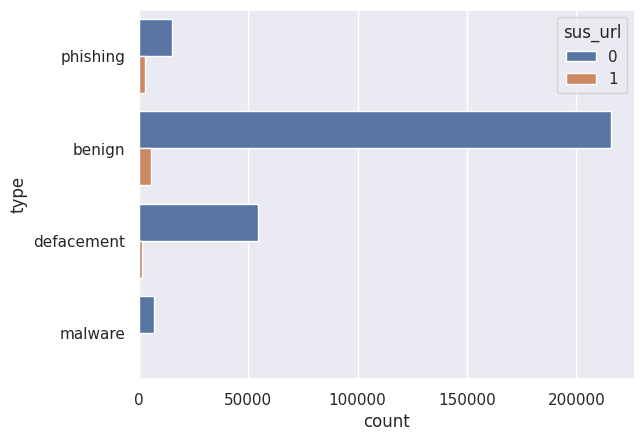

In [52]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="sus_url")

## Short_url:
This feature is created to identify whether the URL uses URL shortening services like bit. \ly, goo.gl, go2l.ink, etc.

In [53]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [54]:
df['short_url'].value_counts()

,count
short_url,
0,284687
1,17977


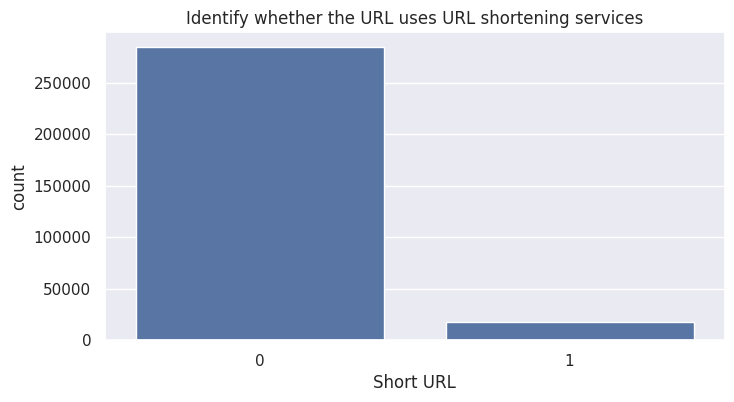

In [55]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="short_url", data=df)
plt.xlabel('Short URL')
plt.title("Identify whether the URL uses URL shortening services")
plt.savefig("./Images/shortening_services.png")

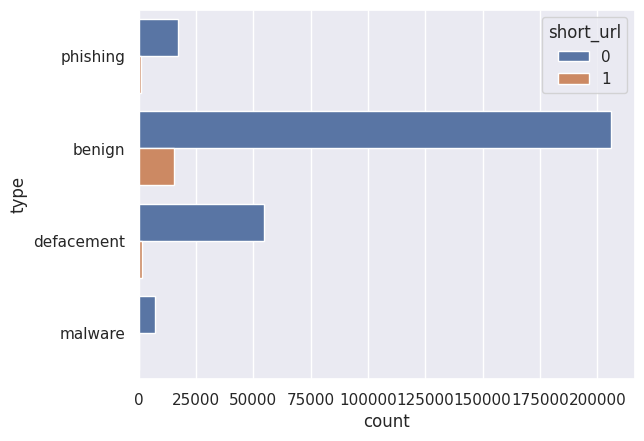

In [56]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="short_url")

In [57]:
df[df['type'] == 'benign']['short_url'].value_counts()

,count
short_url,
0,206036
1,15298


In [58]:
df[df['type'] == 'phishing']['short_url'].value_counts()

,count
short_url,
0,17266
1,856


In [59]:
df[df['type'] == 'defacement']['short_url'].value_counts()

,count
short_url,
0,54458
1,1526


In [60]:
df[df['type'] == 'malware']['short_url'].value_counts()

,count
short_url,
0,6926
1,297


## Count_https:
Generally malicious URLs do not use HTTPS protocols as it generally requires user credentials and ensures that the website is safe for transactions. So, the presence or absence of HTTPS protocol in the URL is an important feature.

In [61]:
def count_https(url):
    return url.count('https')

df['count_https'] = df['url'].apply(lambda i : count_https(i))

In [63]:
df['count_https'].value_counts()

,count
count_https,
0,301227
1,1406
2,21
3,9
4,1


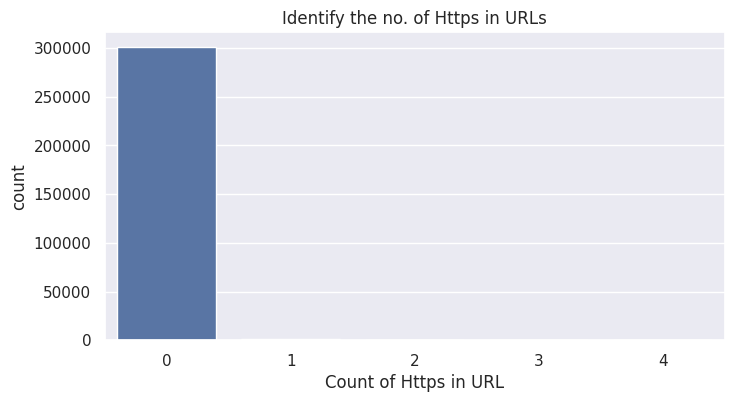

In [64]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count_https", data=df)
plt.xlabel('Count of Https in URL')
plt.title("Identify the no. of Https in URLs")
plt.savefig("./Images/countOfHTTPS.png")

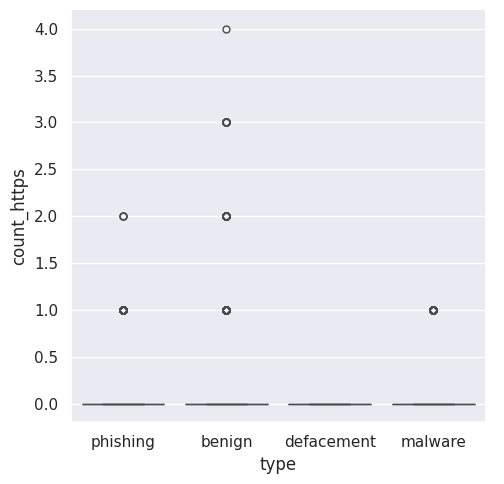

In [65]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count_https", kind="box", data=df)

<Axes: xlabel='count', ylabel='type'>

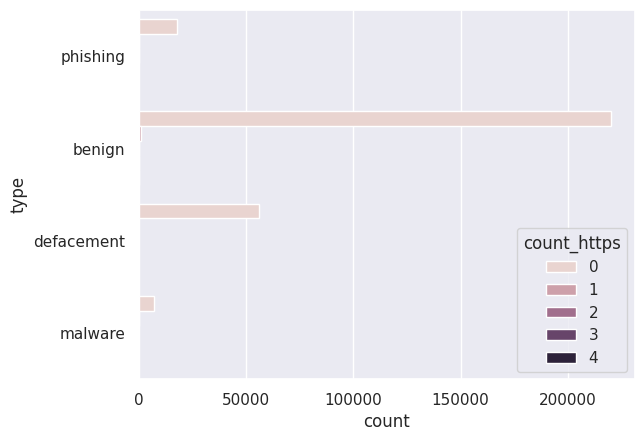

In [66]:
sns.countplot(y = 'type', data = df, hue = 'count_https')

In [67]:
df[df['type'] == 'phishing']['count_https'].value_counts()

,count
count_https,
0,17916
1,203
2,3


In [68]:
df[df['type'] == 'malware']['count_https'].value_counts()

,count
count_https,
0,7166
1,57


In [69]:
df[df['type'] == 'defacement']['count_https'].value_counts()

,count
count_https,
0,55984


## Count_http:
Most of the time, phishing or malicious websites have more than one HTTP in their URL whereas safe sites have only one HTTP.

In [70]:
def count_http(url):
    return url.count('http')

df['count_http'] = df['url'].apply(lambda i : count_http(i))

In [71]:
df['count_http'].value_counts()

,count
count_http,
0,213866
1,87263
2,1281
3,249
4,5


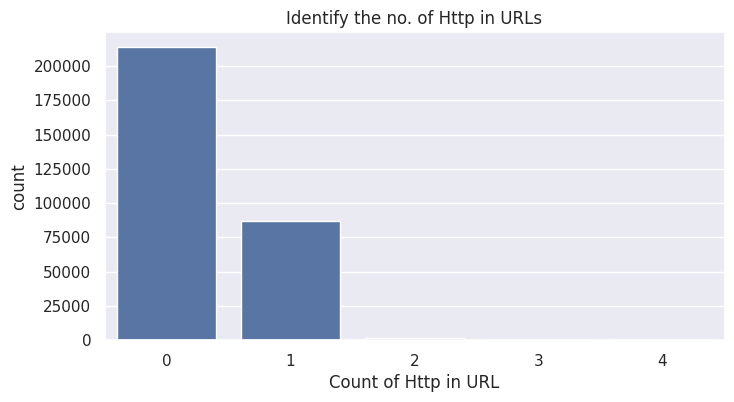

In [72]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count_http", data=df)
plt.xlabel('Count of Http in URL')
plt.title("Identify the no. of Http in URLs")
plt.savefig("./Images/countOfHTTP.png")

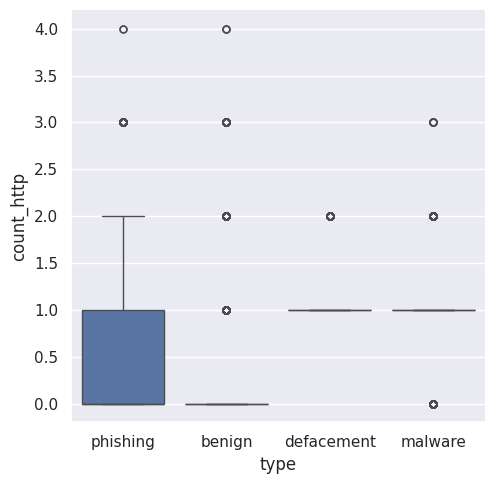

In [73]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count_http", kind="box", data=df)

<Axes: xlabel='count', ylabel='type'>

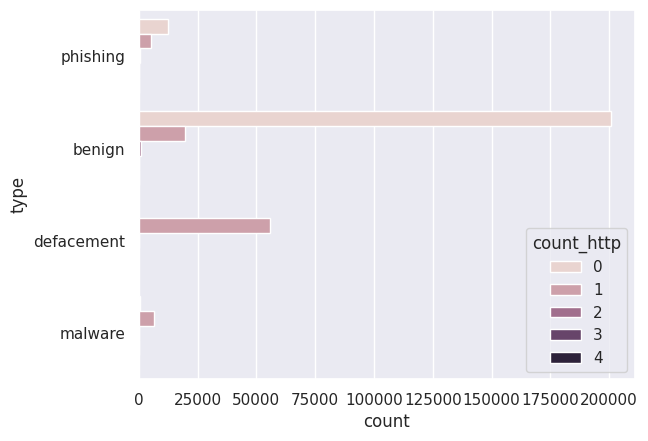

In [74]:
sns.countplot(y = 'type', data = df, hue = 'count_http')

In [75]:
df[df['type'] == 'benign']['count_http'].value_counts()

,count
count_http,
0,200848
1,19612
2,833
3,38
4,3


In [76]:
df[df['type'] == 'phishing']['count_http'].value_counts()

,count
count_http,
0,12320
1,5276
2,320
3,204
4,2


In [77]:
df[df['type'] == 'defacement']['count_http'].value_counts()

,count
count_http,
1,55935
2,49


In [78]:
df[df['type'] == 'malware']['count_http'].value_counts()

,count
count_http,
1,6439
0,698
2,79
3,7


## Count%:
As we know URLs cannot contain spaces. URL encoding normally replaces spaces with symbol (%). Safe sites generally contain less number of spaces whereas malicious websites generally contain more spaces in their URL hence more number of %.

In [79]:
def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

In [80]:
df['count%'].value_counts()

,count
count%,
0,289433
1,2743
2,2393
3,889
21,710
...,...
93,1
118,1
126,1


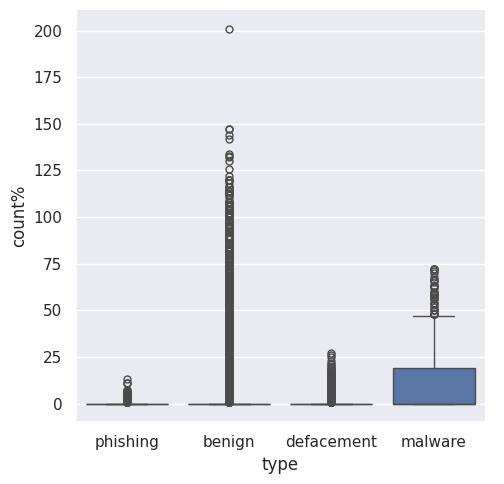

In [81]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count%", kind="box", data=df)

## Count?:
The presence of symbol (?) in URL denotes a query string that contains the data to be passed to the server. More number of ? in URL definitely indicates suspicious URL.

In [82]:
def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

In [83]:
df['count?'].value_counts()

,count
count?,
0,234354
1,67710
2,587
3,3
4,3
11,2
14,1
15,1
6,1


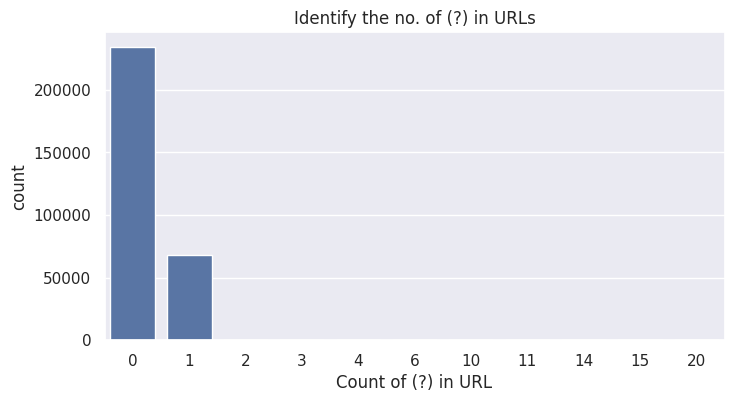

In [84]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count?", data=df)
plt.xlabel('Count of (?) in URL')
plt.title("Identify the no. of (?) in URLs")
plt.savefig("./Images/countOf?.png")

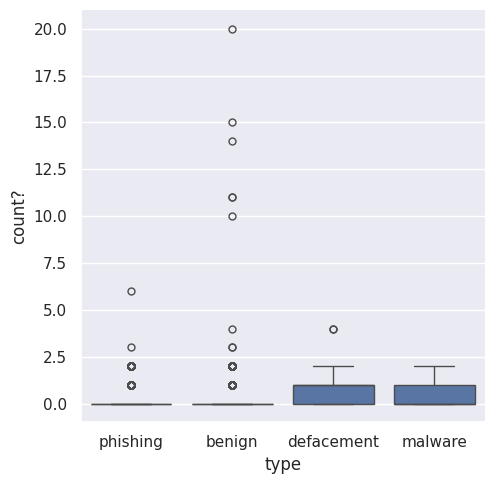

In [85]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count?", kind="box", data=df)

## Count-:
Phishers or cybercriminals generally add dashes(-) in prefix or suffix of the brand name so that it looks genuine URL. For example. www.flipkart-india.com.

In [86]:
def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

In [87]:
df['count-'].value_counts()

,count
count-,
0,167527
1,44690
2,21622
3,14326
4,12094
5,8898
6,6776
7,5026
8,4616


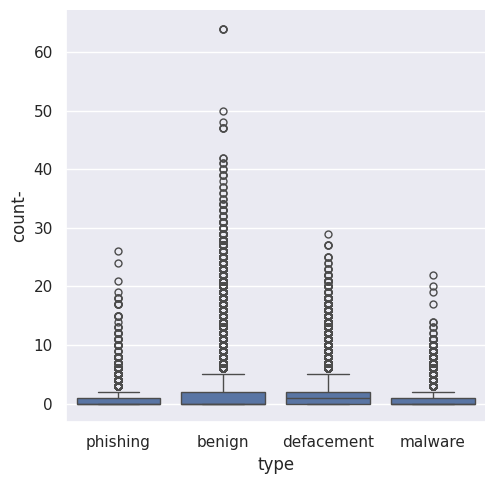

In [88]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-", kind="box", data=df)
plt.savefig("./Images/countOf-.png")

## Count=:
Presence of equal to (=) in URL indicates passing of variable values from one form page to another. It is considered as riskier in URL as anyone can change the values to modify the page.

In [89]:
def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

In [90]:

df['count='].value_counts()

,count
count=,
0,234676
1,26956
4,11730
2,8362
5,7553
3,6598
6,3166
9,1408
7,1041


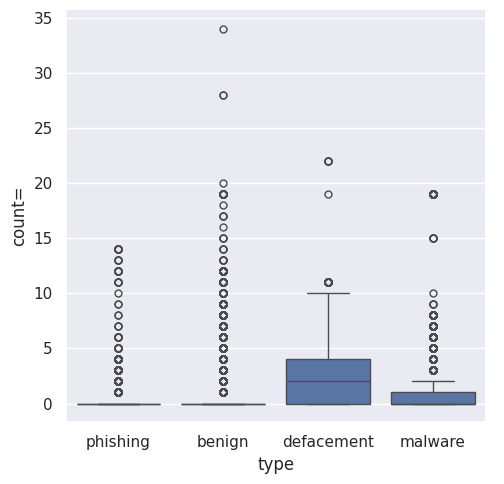

In [91]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count=", kind="box", data=df)
plt.savefig("./Images/countOf=.png")

## url_length:
Attackers generally use long URLs to hide the domain name. We found the average length of a safe URL is 74.

In [92]:
def url_length(url):
    return len(str(url))

df['url_length'] = df['url'].apply(lambda i: url_length(i))

In [93]:
df['url_length'].value_counts()

,count
url_length,
31,9277
40,4982
42,4846
38,4822
37,4794
...,...
422,1
405,1
357,1


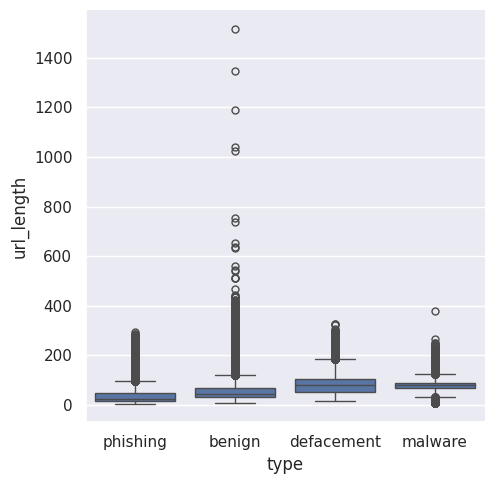

In [94]:

sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="url_length", kind="box", data=df)
plt.savefig("./Images/url-length.png")

## hostname_length:
The length of the hostname is also an important feature for detecting malicious URLs.

In [95]:
def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

In [96]:

df['hostname_length'].value_counts()

,count
hostname_length,
0,213884
15,8048
13,6502
14,6282
17,5581
...,...
138,1
108,1
94,1


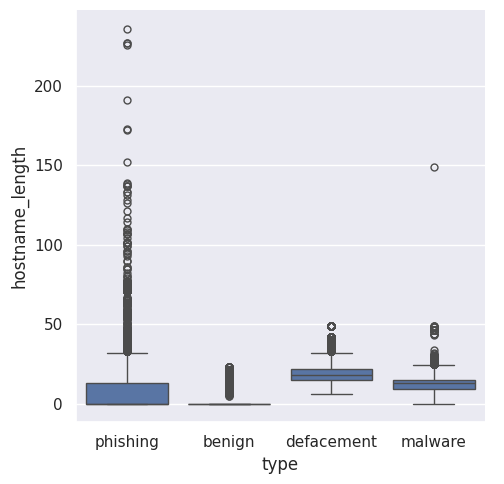

In [97]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="hostname_length", kind="box", data=df)
plt.savefig("./Images/hostname_length.png")

## First directory length:
This feature helps in determining the length of the first directory in the URL. So looking for the first ‘/’ and counting the length of the URL up to this point helps in finding the first directory length of the URL. For accessing directory level information we need to install python library TLD. You can check this link for installing TLD.

In [98]:
pip install tld

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 10.0 MB/s eta 0:00:00


In [99]:
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

In [100]:
df['fd_length'].value_counts()

,count
fd_length,
9,43917
0,41158
4,37491
5,23406
6,20312
...,...
171,1
263,1
186,1


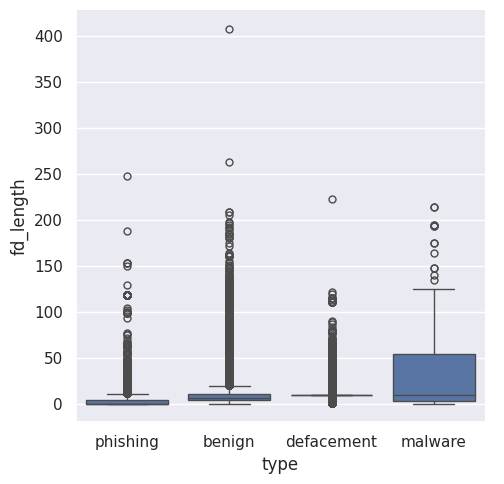

In [101]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="fd_length", kind="box", data=df)
plt.savefig("./Images/firstDirectoryLength.png")


## Length of top-level domains:
A top-level domain (TLD) is one of the domains at the highest level in the hierarchical Domain Name System of the Internet. For example, in the domain name www.example.com, the top-level domain is com. So, the length of TLD is also important in identifying malicious URLs. As most of the URLs have .com extension. TLDs in the range from 2 to 3 generally indicate safe URLs.

In [102]:
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [103]:

df['tld']

,tld
0,None
1,None
2,None
3,be
4,net
...,...
302659,None
302660,None
302661,None
302662,None


In [104]:
df['tld'].value_counts()

,count
tld,
com,34667
de,6495
net,5352
nl,3530
com.br,3270
...,...
net.ma,1
msk.ru,1
space,1


In [105]:

df['tld_length'].value_counts()

,count
tld_length,
-1,213977
3,42928
2,30288
6,9121
5,3255
4,2815
12,103
7,75
9,41


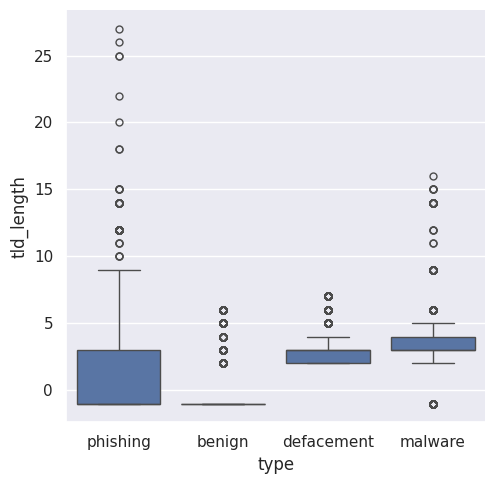

In [106]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="tld_length", kind="box", data=df)
plt.savefig("./Images/tdlLength.png")

In [107]:

df.drop(["tld"], axis = 1, inplace = True)

## Count_digits:
The presence of digits in URL generally indicate suspicious URLs. Safe URLs generally do not have digits so counting the number of digits in URL is an important feature for detecting malicious URLs.

In [108]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits += 1
    return digits


df['count_digits']= df['url'].apply(lambda i: digit_count(i))

In [109]:
df['count_digits'].value_counts()

,count
count_digits,
0,129540
4,20312
6,18544
2,17242
3,15392
...,...
140,1
284,1
1054,1


In [110]:
df['count_digits'].describe()

,count_digits
count,302664.000000
mean,4.656801
std,8.938537
min,0.000000
25%,0.000000
50%,2.000000
75%,6.000000
max,1054.000000


## Count_letters:
The number of letters in the URL also plays a significant role in identifying malicious URLs. As attackers try to increase the length of the URL to hide the domain name and this is generally done by increasing the number of letters and digits in the URL.

In [111]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters += 1
    return letters


df['count_letters']= df['url'].apply(lambda i: letter_count(i))

In [112]:
df['count_letters'].value_counts()

,count
count_letters,
26,7648
25,7421
24,7019
27,6958
30,6833
...,...
254,1
630,1
308,1


In [113]:

df['count_letters'].describe()

,count_letters
count,302664.000000
mean,45.269461
std,27.566699
min,0.000000
25%,26.000000
50%,38.000000
75%,59.000000
max,780.000000


In [114]:

df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domain,...,count%,count?,count-,count=,url_length,hostname_length,fd_length,tld_length,count_digits,count_letters
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,0,0,1,0,16,0,0,-1,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,0,0,35,0,5,-1,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,0,0,31,0,7,-1,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,...,0,1,1,4,88,21,9,2,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,...,0,1,1,3,235,23,9,3,22,199


In [115]:
df.to_csv("preprocessed_data.csv")

# Label Encoding

In [116]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['type_code'] = label_encoder.fit_transform(df['type'])
df['type_code'].value_counts()

,count
type_code,
0,221334
1,55984
3,18122
2,7223
4,1


In [117]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domain', 'sus_url',
       'short_url', 'count_https', 'count_http', 'count%', 'count?', 'count-',
       'count=', 'url_length', 'hostname_length', 'fd_length', 'tld_length',
       'count_digits', 'count_letters', 'type_code'],
      dtype='object')

## Creation of Feature & Target

In [118]:
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domain', 'short_url', 'count%', 'count?', 'count-', 'count=', 'url_length', 'count_https',
       'count_http', 'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count_digits',
       'count_letters']]

In [119]:

Y = df['type_code']

In [120]:

X.shape

(302664, 21)

In [121]:

Y.shape

(302664,)


# Split the Dataset

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2 , shuffle = True, random_state = 42)

In [ ]:
X_train.shape , Y_train.shape

((520952, 21), (520952,))

In [ ]:
X_test.shape , Y_test.shape

((130239, 21), (130239,))

In [ ]:
X_train.values

array([[ 0,  0,  2, ..., -1,  0, 34],
       [ 0,  0,  2, ..., -1,  3, 19],
       [ 0,  0,  2, ..., -1,  0, 26],
       ...,
       [ 0,  1,  3, ...,  2, 11, 67],
       [ 0,  0,  2, ..., -1,  7, 39],
       [ 0,  0,  2, ..., -1,  0, 35]])

In [ ]:
X_test.values

array([[ 1,  1,  4, ..., -1, 11, 18],
       [ 0,  0,  2, ..., -1,  0, 49],
       [ 0,  0,  2, ..., -1,  0, 22],
       ...,
       [ 0,  0,  1, ..., -1,  0, 16],
       [ 0,  0,  2, ..., -1,  0, 27],
       [ 0,  0,  1, ..., -1,  0, 49]])

In [ ]:
X.shape

(651191, 21)

In [ ]:
Y.shape

(651191,)

In [ ]:

X_train.shape

(520952, 21)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(n_estimators = 100, random_state=42)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)

In [ ]:
accuracy

0.966484693524981

In [ ]:
classifier.predict("https://www.google.com")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'https://www.google.com'

## Model Building
Classification report Fuction

In [ ]:
from sklearn.metrics import accuracy_score , precision_recall_fscore_support, classification_report

def result(y_pred , y_test):
    accuracy = accuracy_score(y_test, y_pred) * 100
#     print(accuracy)

    precision , recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average="weighted")

    res = {
        "Accuracy": accuracy,
        "Precision" : precision,
        "Recall" : recall,
        "F1-Score" : f1_score,
        "Support" : support
    }

    print(classification_report(y_test, y_pred ,target_names=['benign', 'defacement','phishing','malware']))



    return res

In [ ]:
from sklearn.metrics import confusion_matrix

def create_confusion_metric(y_pred , y_test):
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'],
                     columns = ['benign', 'defacement','phishing','malware'])

    plt.figure(figsize=(8,6))
    sns.heatmap(cm_df, annot=True,fmt=".1f")
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')

    plt.show()
    plt.savefig("./Images/confusionMatrix.png")

## Model Pipeline